# Introduction to SQL Server

## SELECTion Box 

### Welcome 

Structured Query Language

SQL Server & Transact-SQL
- SQL Server - relational database system developed by Microsoft
- Transact-SQL (T-SQL) - Microsoft's implementation of SQL, with additional functionality
- In this course: Master the fundamentals of T-SQL
- Learn how to write queries

Querying 101
- SQL-Server: the store containing databases and tables
- Queries: how we pick dierent items, from dierent aisles, and load up our cart
- SELECT : key term for retrieving data

In [ ]:
SELECT description
FROM grid;

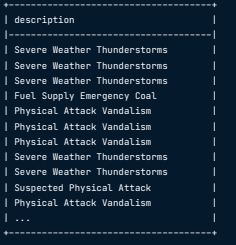

In [ ]:
#Selecting more than one column
SELECT
    artist_id,
    artist_name
FROM
    artist;

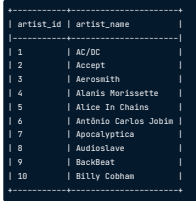

In [ ]:
#Query formatting - both are equal
#option 1
SELECT description, event_year, event_date
FROM grid;

#option 2
SELECT
    description,
    event_year,
    event_date
FROM
    grid;

#### SELECT TOP() (percent)

In [ ]:
#Select TOP ()
#-- Return 5 rows
SELECT TOP(5) artist
FROM artists;

#-- Return top 5% of rows
SELECT TOP(5) PERCENT artist
FROM artists;

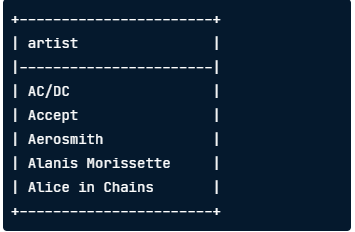

#### SELECT DISTINCT

In [ ]:
# Select DISTINCT
# -- Return all rows in the table
SELECT nerc_region
FROM grid;

#-- Return unique rows
SELECT DISTINCT nerc_region
FROM grid;

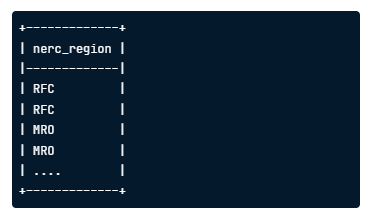  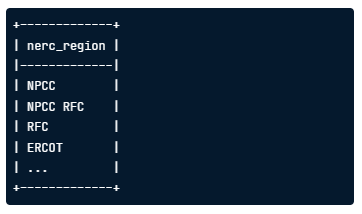

#### SELECT * and AS (alias)

In [ ]:
# Select *
# -- Return all rows
SELECT *
FROM grid;

#PS: not suitable for large tables

Using alias

In [ ]:
# Aliasing column names with AS
SELECT demand_loss_mw AS lost_demand
FROM grid;

SELECT description AS cause_of_outage
FROM grid;

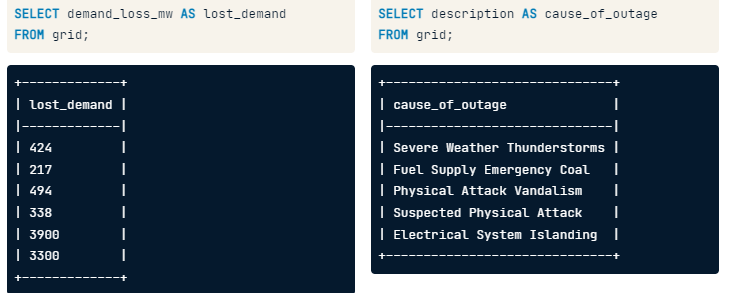

In [2]:
#FULL EXAMPLE

#-- Select the points column
SELECT 
  country 
FROM 
  eurovision;
    
#-- Limit the number of rows returned
SELECT 
  TOP (50) points 
FROM 
  eurovision;

#-- Return unique countries and use an alias
SELECT 
  DISTINCT country AS unique_country 
FROM 
  eurovision;


In [ ]:
#FULL EXAMPLE 2

# -- Select country and event_year from eurovision
SELECT 
  country, 
  event_year 
FROM 
  eurovision;
    
# -- Amend the code to select all columns
SELECT 
  * 
FROM 
  eurovision;
    
# -- Return all columns, restricting the percent of rows returned
SELECT 
  TOP (50) PERCENT * 
FROM 
  eurovision;

### Ordering and filtering

#### ORDER BY (DESC)

Order! Order!
- Tables comprise of rows and columns
- Queries return sets, or subsets

- Sets have no inherent order
- If order is important, use ORDER BY

In [ ]:
SELECT TOP (10) prod_id, year_intro
FROM products
# -- Order in ascending order
ORDER BY year_intro, product_id;

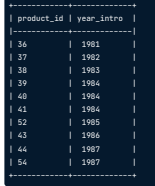

In [ ]:
SELECT TOP (10) channels, year_intro
FROM products
# -- Order in different directions
ORDER BY year_intro DESC, channels;

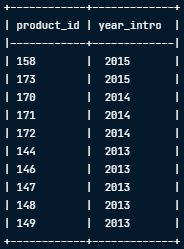

In [ ]:
SELECT
    TOP (10) channels, 
    year_intro
FROM products
# -- Both columns in descending order
ORDER BY 
    year_intro DESC, 
    channels;
    
SELECT
    TOP (10) channelos,
    year_intro
FROM products
# -- Both columns in descending order
ORDER BY
    year_intro DESC,
    channels DESC;

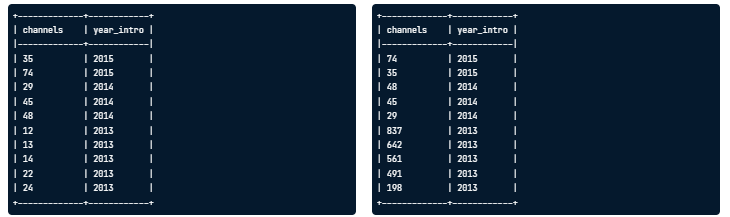

In [ ]:
SELECT city_id, name_alias
FROM invoice
# -- Ordering text (Ascending order)
ORDER BY name_alias;

SELECT city_id, name_alias
FROM invoice
# -- Ordering text (Descending order)
ORDER BY name_alias DESC;

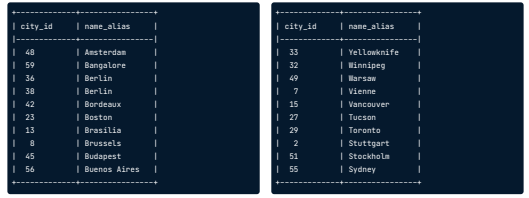

#### WHERE 

What if we only wanted to return rows that met certain criteria?

In [ ]:
SELECT customer_id, total
FROM invoice
WHERE total > 15;

First 3 customers with invoice value > 15:
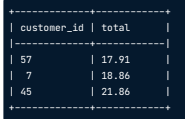

In [ ]:
-- Rows with points greater than 10
WHERE points > 10
-- Rows with points less than 10
WHERE points < 10
-- Rows with points greater than or equal to 10
WHERE points >= 10
-- Rows with points less than or equal to 20
WHERE points <= 20
-- Character data type
WHERE country = 'Spain'
-- Date data type
WHERE event_date = '2012-01-02'

In [ ]:
SELECT customer_id, total
FROM invoice
# -- Testing for non-equality
WHERE total <> 10;

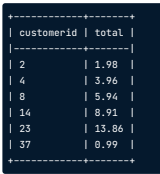

#### WHERE _ BETWEEN

In [ ]:
SELECT customer_id, total
FROM invoice
WHERE total BETWEEN 20 AND 30;

SELECT customer_id, total
FROM invoice
WHERE total NOT BETWEEN 20 AND 30;

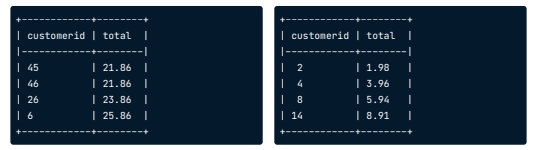

#### WHERE and NULL 

What is NULL?
- NULL indicates there is no value for that record
- NULLs help highlight gaps in our data

In [ ]:
SELECT
TOP (6) total, billing_state
FROM invoice
WHERE billing_state IS NULL;

SELECT
TOP (6) total, billing_state
FROM invoice
WHERE billing_state IS NOT NULL;

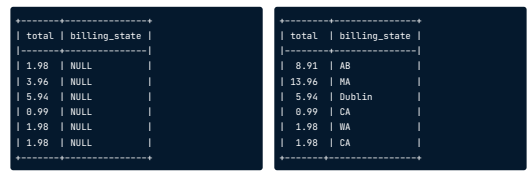

In [ ]:
#FULL EXAMPLE

-- Select the first 5 rows from the specified columns
SELECT 
  TOP (5) description, 
  event_date 
FROM 
  grid 
  -- Order your results by the event_date column
ORDER BY 
  event_date;

#FULL EXAMPLE 2

-- Select the top 20 rows from description, nerc_region and event_date
SELECT 
  TOP (20) description,
  nerc_region,
  event_date
FROM 
  grid 
  -- Order by nerc_region, affected_customers & event_date
  -- Event_date should be in descending order
ORDER BY
  nerc_region,
  affected_customers,
  event_date DESC;

In [ ]:
#EXAMPLE 3
-- Select description and event_year
SELECT 
  description, 
  event_year 
FROM 
  grid 
  -- Filter the results
WHERE 
  description = 'vandalism';

In [ ]:
#EXAMPLE 4.1
-- Select nerc_region and demand_loss_mw
SELECT 
  nerc_region, 
  demand_loss_mw 
FROM 
  grid 
-- Retrieve rows where affected_customers is >= 500000  (500,000)
WHERE 
  affected_customers >= 500000;

#EXAMPLE 4.2
-- Select description and affected customers
SELECT 
  description, 
  affected_customers
FROM 
  grid 
  -- Retrieve rows where the event_date was the 22nd December, 2013    
WHERE 
  event_date = '2013-12-22';

#EXAMPLE 4.3
-- Select description, affected_customers and event date
SELECT 
  description, 
  affected_customers,
  event_date
FROM 
  grid 
  -- The affected_customers column should be >= 50000 and <=150000   
WHERE 
  affected_customers BETWEEN 50000 AND 150000
   -- Define the order   
ORDER BY  
  event_date DESC;

In [ ]:
#EXAMPLE 5.1
-- Retrieve all columns
SELECT 
  * 
FROM 
  grid 
  -- Return only rows where demand_loss_mw is missing or unknown  
WHERE 
  demand_loss_mw IS NULL;
    
#EXAMPLE 5.2
-- Retrieve all columns
SELECT 
  * 
FROM 
  grid 
  -- Return rows where demand_loss_mw is not missing or unknown   
WHERE 
  demand_loss_mw IS NOT NULL;

### WHERE the wild things are 

#### WHERE and AND 

In [ ]:
SELECT song, artist
FROM songlist
WHERE
artist = 'AC/DC';

SELECT song, artist
FROM songlist
WHERE
    artist = 'AC/DC'
    AND release_year < 1980;

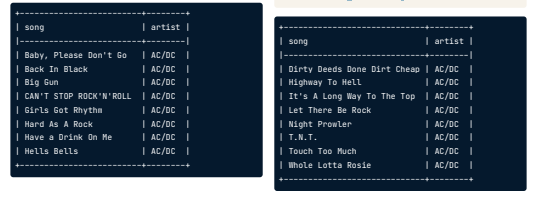

In [ ]:
# Returns 3 rows:
SELECT *
FROM songlist
WHERE
    release_year = 1994
    AND artist = 'Green Day';

# Returns 1 row:
SELECT *
FROM songlist
WHERE
    release_year = 1994
    AND artist = 'Green Day'
    AND song = 'Basket Case';
#no figure to illustrate

#### WHERE and OR 

In [ ]:
SELECT
    song,
    artist,
    release_year
FROM songlist
WHERE 
    release_year = 1994
    OR release_year > 2000;

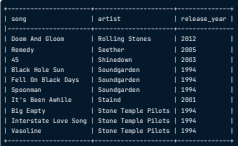

In [ ]:
SELECT song
FROM songlist
WHERE
    artist = 'Green Day'
    AND release_year = 1994;

SELECT song
FROM songlist
WHERE
    artist = 'Green Day'
    AND release_year > 2000;

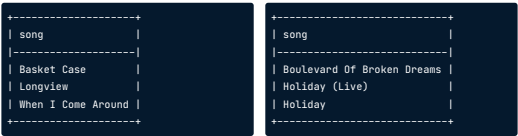

WRONG EXAMPLE

In [ ]:
SELECT song
FROM songlist
WHERE 
    artist = 'Green Day'
    AND release_year = 1994
    OR release_year > 2000;
#we used the parenthesis wrong - it takes two different datasets

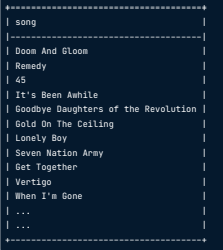

RIGHT EXAMPLE

In [ ]:
#shorter way
SELECT song
FROM songlist
WHERE
    artist = 'Green Day'
    AND (
        release_year = 1994
        OR release_year > 2000
);

#longer way
SELECT song
FROM songlist
WHERE
    (
        artist = 'Green Day'
        AND release_year = 1994
    )
    OR (
        artist = 'Green Day'
        AND release_year > 2000
    );

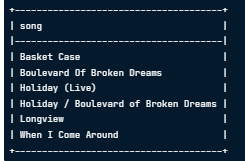

#### WHERE and IN 

In [ ]:
SELECT song, artist
FROM songlist
WHERE
    artist IN ('Van Halen','ZZ Top')
ORDER BY song;

SELECT song, release_year
FROM songlist
WHERE
    release_year IN (1985, 1991, 1992);

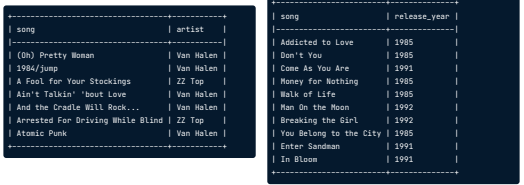

#### WHERE and LIKE

In [ ]:
SELECT song
FROM songlist
WHERE song LIKE 'a%';

SELECT artist
FROM songlist
WHERE artist LIKE 'f%';

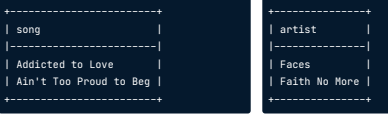

In [ ]:
#EXAMPLE 1
-- Retrieve the song,artist and release_year columns
SELECT 
  song, 
  artist, 
  release_year 
FROM 
  songlist 
  -- Ensure there are no missing or unknown values in the release_year column
WHERE 
  release_year IS NOT NULL 
  -- Arrange the results by the artist and release_year columns
ORDER BY 
  artist, 
  release_year;

In [ ]:
#EXAMPLE
SELECT 
  song, 
  artist, 
  release_year
FROM 
  songlist 
WHERE 
  -- Retrieve records greater than and including 1980
  release_year >= 1980 
  -- Also retrieve records up to and including 1990
  AND release_year <= 1990 
ORDER BY 
  artist, 
  release_year;

In [ ]:
SELECT 
  artist, 
  release_year, 
  song 
FROM 
  songlist 
  -- Choose the correct artist and specify the release year
WHERE 
  (
    artist LIKE 'B%' 
    AND release_year = 1986
  ) 
  -- Or return all songs released after 1990
  OR release_year > 1990 
  -- Order the results
ORDER BY 
  release_year, 
  artist, 
  song;

## Groups, strings, and counting things 

### Aggregating Data

#### SUM() and AS

In [ ]:
# SUM - single column
# - Calculate the total amount of a column value with SUM()
SELECT
    SUM(affected_customers) AS total_affected
FROM grid;

# SUM - two or more columns
SELECT
    SUM(affected_customers) AS total_affected
    SUM(demand_loss_mw) AS total_loss #everyone need the agg function
FROM grid;

#wrong way:
SELECT
    SUM(affected_customers) AS total_affected,
    (demand_loss_mw) AS total_loss
FROM grid;

#use aliases
SELECT
    SUM(affected_customers)
    SUM(demand_loss_mw)
FROM grid;

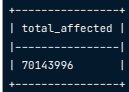 
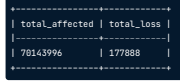
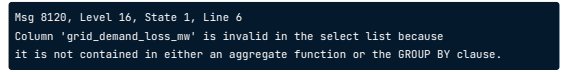
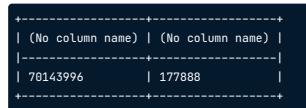

#### COUNT()

SELECT
    COUNT(affected_customers) AS count_affected
FROM grid;

#### COUNT (DISTINCT _ )

SELECT
    COUNT(DISTINCT affected_customers) AS unique_count_affected
FROM grid;

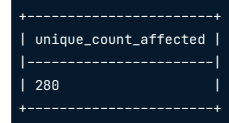

#### MIN ()

SELECT
    MIN(affected_customers) AS min_affected_customers
FROM grid;

SELECT
    MIN(affected_customers) AS min_affected_customers
FROM grid
WHERE affected_customers > 0;

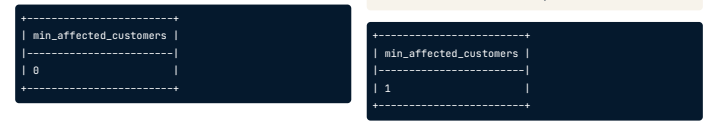

#### MAX ()

In [ ]:
SELECT
    MAX(affected_customers) AS max_
affected_customers
FROM grid;

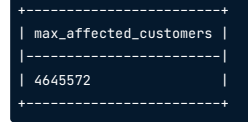

#### AVERAGE 

In [ ]:
SELECT
    AVG (affected_customers) AS avg_affected_customers
FROM grid;

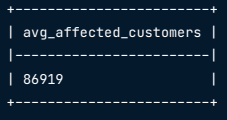

In [ ]:
#EXAMPLE 1
-- Sum the demand_loss_mw column
SELECT 
  SUM(demand_loss_mw) AS MRO_demand_loss 
FROM 
  grid 
WHERE
  -- demand_loss_mw should not contain NULL values
  demand_loss_mw IS NOT NULL
  -- and nerc_region should be 'MRO';
  AND nerc_region = 'MRO';

In [ ]:
#EXAMPLE 2
-- Obtain a count of 'grid_id'
SELECT 
  COUNT(grid_id) AS RFC_count
FROM 
  grid
-- Restrict to rows where the nerc_region is 'RFC'
WHERE
  nerc_region = 'RFC';

In [ ]:
#EXAMPLE 3 (min/max/avg)
-- Find the minimum number of affected customers
SELECT 
  MIN(affected_customers) AS min_affected_customers 
FROM 
  grid
-- Only retrieve rows where demand_loss_mw has a value
WHERE
  demand_loss_mw IS NOT NULL;

### Strings 

#### LEN() 

SELECT
    description,
    LEN(description) AS description_length
FROM grid;

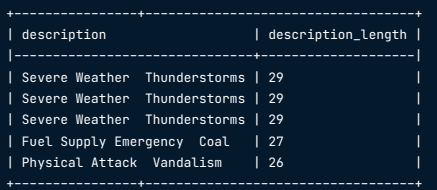

#### LEFT/RIGHT

In [ ]:
SELECT
    description,
    LEFT(description, 20) AS first_20_left
FROM grid;

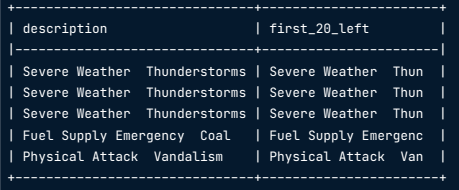

In [ ]:
SELECT
    description,
    RIGHT(description, 20) AS last_20
FROM grid;

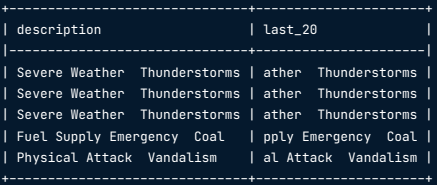

#### CHARINDEX 

In [ ]:
#Find a character inside a column
SELECT
    CHARINDEX ('_', url) AS char_location,
    url
FROM courses;

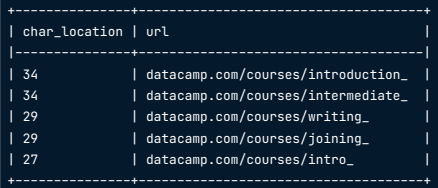

#### SUBSTRING 

In [ ]:
SELECT
    SUBSTRING(url, 12, 12) AS target_section, (#column name, number of characters to start, number of character to extract)
    url
FROM courses;

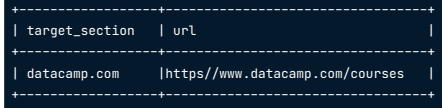

#### REPLACE 

In [ ]:
SELECT
    TOP(5) REPLACE(url,'_','-') AS replace_with_hyphen
FROM courses;

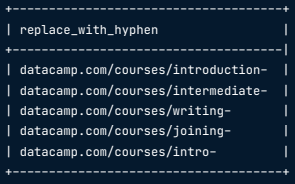

In [ ]:
#EXAMPLE
-- Calculate the length of the description column
SELECT 
  LEN (description) AS description_length 
FROM 
  grid;

#EXAMPLE 2
-- Select the first 25 characters from the left of the description column
SELECT 
  LEFT(description, 25) AS first_25_left 
FROM 
  grid;

#EXAMPLE 3
-- Amend the query to select 25 characters from the  right of the description column
SELECT 
  RIGHT(description, 25) AS last_25_right 
FROM 
  grid;

In [ ]:
#EXAMPLE
-- Complete the substring function to begin extracting from the correct character in the description column
SELECT TOP (10)
  description, 
  CHARINDEX('Weather', description) AS start_of_string, 
  LEN ('Weather') AS length_of_string, 
  SUBSTRING(
    description, 
    15, 
    LEN(description)
  ) AS additional_description 
FROM 
  grid
WHERE description LIKE '%Weather%';

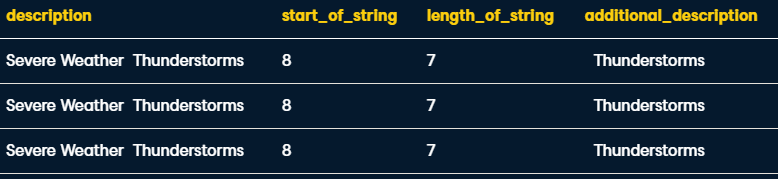

### Grouping and Having 

A simple SELECT

In [ ]:
SELECT
    SUM(demand_loss_mw) AS lost_demand
FROM grid;

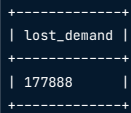

Grouping error
- Can we break this down by adding an additional column?

In [ ]:
SELECT
    SUM(demand_loss_mw) AS lost_demand,
    description
FROM grid;

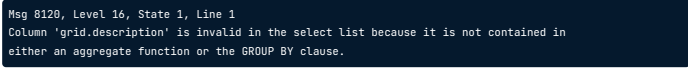

#### GROUP BY 

In [ ]:
SELECT
    SUM(demand_loss_mw) AS lost_demand,
    description
FROM grid
GROUP BY description;

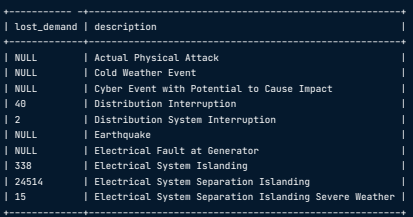

In [ ]:
SELECT
    SUM(demand_loss_mw) AS lost_demand,
    description
FROM grid
WHERE
    description LIKE '%storm'
    AND demand_loss_mw IS NOT NULL
GROUP BY description;

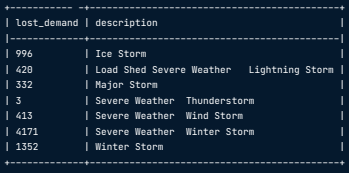

#### HAVING 

HAVING
- Can use aggregate functions in SELECT
- Filter data using WHERE
- Split data into groups using GROUP BY
- What if we want to sum values based on groups?
- ... and then lter on those sums?

In [ ]:
SELECT
    SUM(demand_loss_mw) AS lost_demand,
    description
FROM grid
WHERE
    description LIKE '%storm'
    AND demand_lossmw IS NOT NULL
GROUP BY description
HAVING SUM(demand_loss_mw) > 1000;

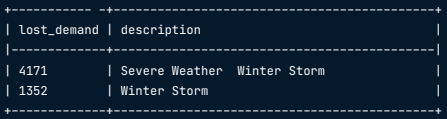

Summary
- GROUP BY splits the data up into combinations of one or more values
- WHERE filters on row values
- HAVING appears ater the GROUP BY clause and **filters on groups or aggregates**

In [ ]:
#Example
-- Select the region column
SELECT 
  nerc_region,
  -- Sum the demand_loss_mw column
  SUM(demand_loss_mw) AS demand_loss
FROM 
  grid
  -- Exclude NULL values of demand_loss
WHERE 
  demand_loss_mw IS NOT NULL
  -- Group the results by nerc_region
GROUP BY 
  nerc_region
  -- Order the results in descending order of demand_loss
ORDER BY 
  demand_loss DESC;

In [ ]:
#Example 2
SELECT 
  nerc_region, 
  SUM (demand_loss_mw) AS demand_loss 
FROM 
  grid 
  -- Remove the WHERE clause

GROUP BY 
  nerc_region 
  -- Enter a new HAVING clause so that the sum of demand_loss_mw is greater than 10000
HAVING 
  sum(demand_loss_mw) > 10000 
ORDER BY 
  demand_loss DESC;

In [ ]:
#Example 3
SELECT 
  country, 
  COUNT (country) AS country_count, 
  AVG (place) AS avg_place, 
  AVG (points) AS avg_points, 
  MIN (points) AS min_points, 
  MAX (points) AS max_points 
FROM 
  eurovision 
GROUP BY 
  country 
  -- The country column should only contain those with a count greater than 5
HAVING 
  COUNT(country) > 5 
  -- Arrange columns in the correct order
ORDER BY 
  avg_place, 
  avg_points DESC;

## Joining tables

### Joining tables

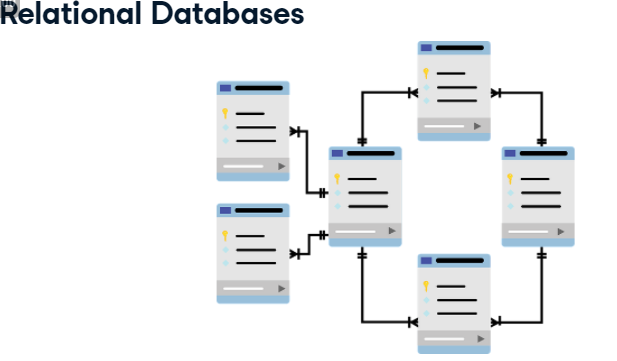

#### Primary Keys

- Primary keys: Uniquely identify each row in a table
- Primary key: artist_id

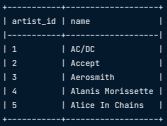

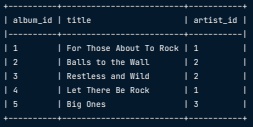

- Primary key: album_id
- What about artist_id ?

#### Foreign keys

Foreign keys
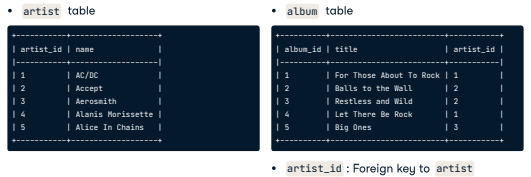

Joining album and artist
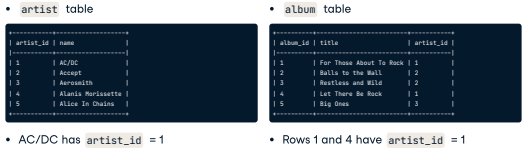

Joining album and artist
- Return album details from album table
- Return corresponding artist details from artist table
- Joined using artist_id column

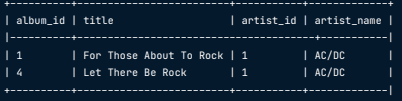

#### INNER JOIN 

In [ ]:
SELECT 
    album_id,
    title,
    album.artist_id,
    name AS artist_name
FROM album
INNER JOIN artist ON artist.artist_id = album.artist_id
WHERE album.artist_id = 1;

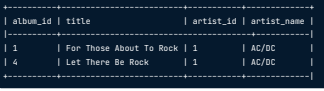

Syntax

In [ ]:
SELECT
    table_A.columnX,
    table_A.columnY,
    table_B.columnZ
FROM table_A
INNER JOIN table_B ON table_A.foreign_key = table_B.primary_key;

In [ ]:
SELECT
    album_id,
    title,
    album.artist_id,
    name AS artist_name
FROM album
INNER JOIN artist on artist.artist_id = album.artist_id;

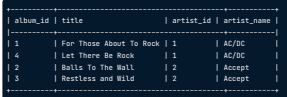

Returns all combinations of all matches between album and artist

#### Multiple INNER JOINS 

In [ ]:
SELECT
    table_A.columnX,
    table_A.columnY,
    table_B.columnZ, 
    table_C.columnW
FROM table_A
INNER JOIN table_B ON table_B.foreign_key = table_A.primary_key
INNER JOIN table_C ON table_C.foreign_key = table_B.primary_key;

In [ ]:
#EXAMPLE
SELECT 
  track_id,
  name AS track_name,
  title AS album_title
FROM track
  -- Complete the join type and the common joining column
INNER JOIN album on track.album_id = album.album_id;

In [ ]:
#EXAMPLE
-- Select album_id and title from album, and name from artist
SELECT 
  album_id,
  title,
  artist.name AS artist
  -- Enter the main source table name
FROM album
  -- Perform the inner join
INNER JOIN artist on album.artist_id = artist.artist_id;

In [ ]:
#EXAMPLE
SELECT track_id,
-- Enter the correct table name prefix when retrieving the name column from the track table
  track.name AS track_name,
  title as album_title,
  -- Enter the correct table name prefix when retrieving the name column from the artist table
  artist.name AS artist_name
FROM track
  -- Complete the matching columns to join album with track, and artist with album
INNER JOIN album on track.album_id = album.album_id 
INNER JOIN artist on album.artist_id = artist.artist_id;

### Mix n match - LEFT & RIGHT JOIN

The rationale for LEFT and RIGHT joins
- Why do we need LEFT and RIGHT joins?
- One table may not have an exact match in another:
- Customer order history for marketing campaign
- Product list and returns history
- Patients admied but not yet discharged

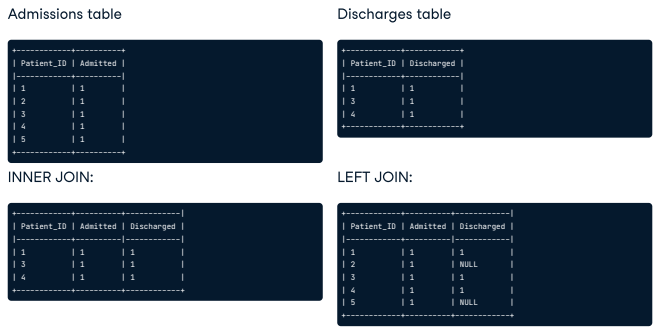

#### LEFT JOIN SYNTAX 

In [ ]:
SELECT
    Admitted.Patient_ID,
    Admitted,
    Discharged
FROM Admitted
LEFT JOIN Discharged ON Discharged.Patient_ID = Admitted.Patient_ID;

#### RIGHT JOIN 

In [ ]:
SELECT
    Admitted.Patient_ID,
    Admitted,
    Discharged
FROM Discharged
RIGHT JOIN Admitted ON Admitted.Patient_ID = Discharged.Patient_ID;

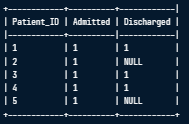

Summary
- INNER JOIN : Only returns matching rows
- LEFT JOIN (or RIGHT JOIN ): All rows from the main table plus matches from the joining table
- NULL : Displayed if no match is found
- LEFT JOIN and RIGHT JOIN can be interchangeable

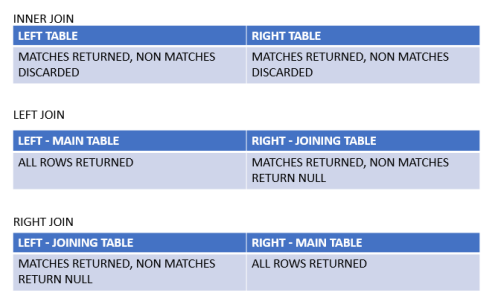

In [ ]:
#EXAMPLE
SELECT 
  invoiceline_id,
  unit_price, 
  quantity,
  billing_state
  -- Specify the source table
FROM invoice
  -- Complete the join to the invoice table
LEFT JOIN invoiceline
ON invoiceline.invoice_id = invoice.invoice_id;

In [ ]:
#EXAMPLE
-- SELECT the fully qualified album_id column from the album table
SELECT 
  album.album_id,
  title,
  album.artist_id,
  -- SELECT the fully qualified name column from the artist table
  artist.name as artist
FROM album
-- Perform a join to return only rows that match from both tables
INNER JOIN artist ON album.artist_id = artist.artist_id
WHERE album.album_id IN (213,214)

In [ ]:
SELECT 
  album.album_id,
  title,
  album.artist_id,
  artist.name as artist
FROM album
INNER JOIN artist ON album.artist_id = artist.artist_id
-- Perform the correct join type to return matches or NULLS from the track table
RIGHT JOIN track on album.album_id = track.album_id
WHERE album.album_id IN (213,214)

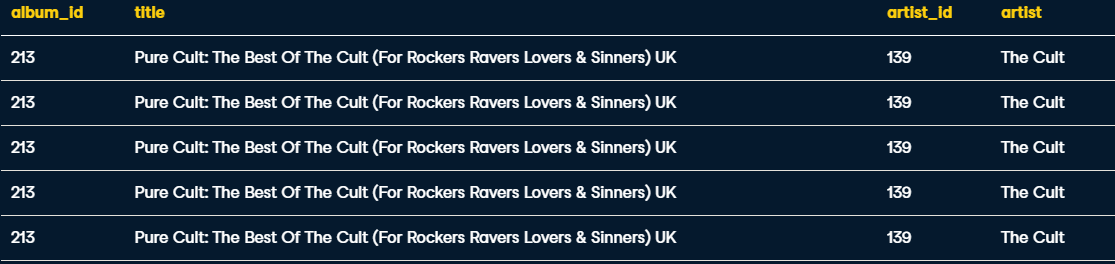

### UNION & UNION ALL 

In [ ]:
SELECT
    album_id,
    title,
    artist_id
FROM album
WHERE artist_id IN (1, 3)

SELECT 
    album_id,
    title,
    artist_id
FROM album
WHERE artist_id IN (1, 4, 5)

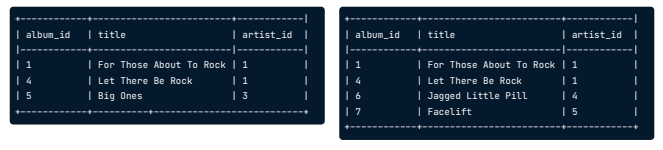

Combining results

In [ ]:
SELECT
    album_id,
    title,
    artist_id
FROM album
WHERE artist_id IN (1, 3)
UNION #like concat from python
SELECT
    album_id,
    title,
    artist_id
FROM album
WHERE artist_id IN (1, 4, 5);

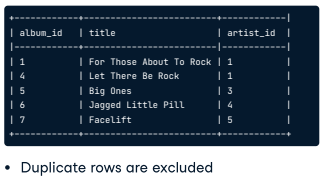

#### UNION ALL 

In [ ]:
SELECT
    album_id,
    title,
    artist_id
FROM album
WHERE artist_id IN (1, 3)
UNION ALL
SELECT
    album_id,
    title,
    artist_id
FROM album
WHERE artist_id IN (1, 4, 5);

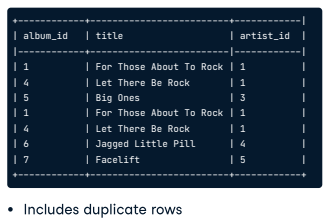

Creating new column names for final results

In [ ]:
SELECT
    album_id AS ALBUM_ID,
    title AS ALBUM_TITLE,
    artist_id AS ARTIST_ID
FROM album
WHERE artist_id IN(1, 3)
UNION ALL
SELECT
    album_id AS ALBUM_ID,
    title AS ALBUM_TITLE,
    artist_id AS ARTIST_ID
FROM album
WHERE artist_id IN(1, 4, 5)

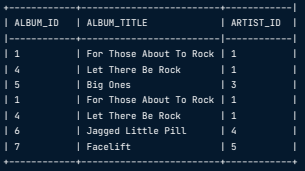

Summary
- UNION or UNION ALL : Combines queries from the same table or dierent tables

If combining data from dierent tables:
- Select the same number of columns in the same order
- Columns should have the same data types

If source tables have dierent column names
- Alias the column names
- UNION : Discards duplicates (slower to run)
- UNION ALL : Includes duplicates (faster to run)

In [ ]:
#Example
SELECT 
  album_id AS ID,
  title AS description,
  'Album' AS Source
  -- Complete the FROM statement
FROM album
 -- Combine the result set using the relevant keyword
UNION
SELECT 
  artist_id AS ID,
  name AS description,
  'Artist'  AS Source
  -- Complete the FROM statement
FROM artist;

## You've got the power 

### Creator 

CRUD operations
- CREATE
    - Databases, Tables or views
    - Users, permissions, and security groups
- READ
    - Example: SELECT statements
- UPDATE
    - Amend existing database records
- DELETE

CREATE
- CREATE TABLE unique table name
- (column name, data type, size)

In [ ]:
CREATE TABLE test_table(
    test_date date,
    test_name varchar(20), #up to 20 characters
    test_int int
)

A few considerations when creating a table
- Table and column names
- Type of data each column will store
- Size or amount of data stored in the column

Data types
- Dates:
    - date ( YYYY-MM-DD ), datetime ( YYYY-MM-DD hh:mm:ss )
    - time
- Numeric:
    - integer, decimal, float
    - bit ( 1 = TRUE , 0 = FALSE . Also accepts NULL values)
- Strings:
    - char , varchar , nvarchar

In [ ]:
#EXAMPLE
-- Create the table
CREATE TABLE results (
-- Create track column
track VARCHAR(200),
-- Create artist column
artist VARCHAR(120),
-- Create album column
album VARCHAR(160),
-- Create track_length_mins
track_length_mins INT,
);

-- Select all columns from the table
SELECT 
  track, 
  artist, 
  album, 
  track_length_mins 
FROM 
  results;

### Insert, Update, Delete 

#### INSERT

In [ ]:
INSERT INTO table_name
INSERT INTO table_name (col1, col2, col3)
INSERT INTO table_name (col1, col2, col3)
VALUES
    ('value1','value2', value3)

#### INSERT SELECT

In [ ]:
INSERT INTO table_name (col1, col2, col3)
SELECT
    column1,
    column2,
    column3
FROM other_table
WHERE
-- conditions apply

# Don't use SELECT *
# Be specic in case table structure changes

#### UPDATE 

In [ ]:
UPDATE
UPDATE table
SET column = value,
WHERE
-- Condition(s);
# Don't forget the WHERE clause!

UPDATE table
SET
    column1 = value1,
    column2 = value2
WHERE
-- Condition(s);

#### DELETE 

In [ ]:
DELETE
FROM table
WHERE
-- Conditions
# Test beforehand!

TRUNCATE TABLE table_name
# Clears the entire table at once

In [ ]:
#EXAMPLE

-- Create the table
CREATE TABLE tracks(
	-- Create track column
	track VARCHAR(200),
    -- Create album column
  	album VARCHAR(160),
	-- Create track_length_mins column
	track_length_mins INT
);
-- Select all columns from the new table
SELECT 
  * 
FROM 
  tracks;

In [ ]:
#EXAMPLE 2
-- Create the table
CREATE TABLE tracks(
  -- Create track column
  track VARCHAR(200), 
  -- Create album column
  album VARCHAR(160), 
  -- Create track_length_mins column
  track_length_mins INT
);
-- Complete the statement to enter the data to the table         
INSERT INTO tracks
-- Specify the destination columns
(track, album, track_length_mins)
-- Insert the appropriate values for track, album and track length
VALUES
  ('Basket Case', 'Dookie', 3);
-- Select all columns from the new table
SELECT 
  *
FROM 
  tracks;

In [ ]:
#EXAMPLE 3
-- Select the album
SELECT 
  title 
FROM 
  album 
WHERE 
  album_id = 213;
-- UPDATE the title of the album
UPDATE 
  album 
SET 
  title = 'Pure Cult: The Best Of The Cult' 
WHERE 
  album_id = 213;
-- Run the query again
SELECT 
  title 
FROM 
  album
WHERE 
  album_id = 213;

In [ ]:
#EXAMPLE 4
-- Run the query
SELECT 
  * 
FROM 
  album 
  -- DELETE the record
DELETE FROM 
  album 
WHERE 
  album_id = 1 
  -- Run the query again
SELECT 
  * 
FROM 
  album;

### Declare yourself 

#### DECLARE 

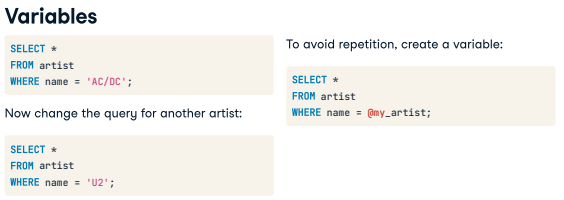

In [ ]:
# DECLARE
DECLARE @

# Integer variable:   
DECLARE @test_int INT

# Varchar variable:    
DECLARE @my_artist VARCHAR(100)

#### SET 

In [ ]:
# Integer variable:
DECLARE @test_int INT

SET @test_int = 5

# Assign value to @my_artist :
DECLARE @my_artist varchar(100)

SET @my_artist = 'AC/DC'

In [ ]:
DECLARE @my_artist varchar(100) #declare first, than set values
DECLARE @my_album varchar(300);

SET @my_artist = 'AC/DC'
SET @my_album = 'Let There Be Rock' ;

SELECT --
FROM --
WHERE artist = @my_artist
AND album = @my_album;

#Another option (same thing)
DECLARE @my_artist varchar(100)
DECLARE @my_album varchar(300);

SET @my_artist = 'U2'
SET @my_album = 'Pop' ;

SELECT --
FROM --
WHERE artist = @my_artist
AND album = @my_album;

#### Temporary tables

In [ ]:
Temporary tables
SELECT
    col1,
    col2,
    col3 INTO #my_temp_table
FROM my_existing_table
WHERE
-- Conditions

#my_temp_table exists until connection or session ends

-- Remove table manually
DROP TABLE #my_temp_table

In [ ]:
#EXAMPLE
-- Declare the variable @region
DECLARE @region VARCHAR(10)

-- Update the variable value
SET @region = 'RFC'

SELECT description,
       nerc_region,
       demand_loss_mw,
       affected_customers
FROM grid
WHERE nerc_region = @region;

In [ ]:
#EXAMPLE
-- Declare @start
DECLARE @start DATE

-- Declare @stop
DECLARE @stop DATE

-- Declare @affected
DECLARE @affected INT

-- SET @start to '2014-01-24'
SET @start = '2014-01-24'

-- SET @stop to '2014-07-02'
SET @stop  = '2014-07-02'

-- Set @affected to 5000
SET @affected = 5000

In [ ]:
#EXAMPLE
-- Declare your variables
DECLARE @start DATE
DECLARE @stop DATE
DECLARE @affected INT;
-- SET the relevant values for each variable
SET @start = '2014-01-24'
SET @stop  = '2014-07-02'
SET @affected =  5000 ;

SELECT 
  description,
  nerc_region,
  demand_loss_mw,
  affected_customers
FROM 
  grid
-- Specify the date range of the event_date and the value for @affected
WHERE event_date BETWEEN @start AND @stop
AND affected_customers >= @affected;

In [ ]:
#EXAMPLE
SELECT  album.title AS album_title,
  artist.name as artist,
  MAX(track.milliseconds / (1000 * 60) % 60 ) AS max_track_length_mins
-- Name the temp table #maxtracks
INTO #maxtracks
FROM album
-- Join album to artist using artist_id
INNER JOIN artist ON album.artist_id = artist.artist_id
-- Join track to album using album_id
INNER JOIN track ON album.album_id = track.album_id
GROUP BY artist.artist_id, album.title, artist.name,album.album_id
-- Run the final SELECT query to retrieve the results from the temporary table
SELECT album_title, artist, max_track_length_mins
FROM  #maxtracks
ORDER BY max_track_length_mins DESC, artist;

### Congratulations 

What we learned...
- Selecting: SELECT
- Ordering: ORDER BY
- Filtering: WHERE and HAVING
- Aggregating: SUM , COUNT , MIN , MAX and AVG
- Text manipulation: LEFT , RIGHT , LEN and SUBSTRING

What we learned (II)...
- GROUP BY
- INNER JOIN , LEFT JOIN , RIGHT JOIN
- UNION and UNION ALL
- Create, Read, Update and Delete (CRUD)
- Variables
- Temporary tables

Next Steps
- Intermediate SQL Server
- Joining Data in SQL